In [1]:
import pandas as pd
import numpy
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
features = data.filter(regex=r"_mean", axis=1)

In [5]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [6]:
y = data['diagnosis'].map({"M": 0, "B": 1}) # Maligno Benigno

In [7]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(features, y, train_size=0.5)

In [9]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((284, 10), (285, 10), (284,), (285,))

In [10]:
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
mdl.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [11]:
from sklearn.metrics import classification_report
p = mdl.predict(Xval)
print(classification_report(yval, p))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        99
           1       0.95      0.92      0.94       186

    accuracy                           0.92       285
   macro avg       0.91      0.92      0.91       285
weighted avg       0.92      0.92      0.92       285



In [12]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [13]:
p[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [14]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(Xtrain)

In [15]:
explainer

In [16]:
shap_values[1].shape

(284, 10)

In [17]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], Xtrain.iloc[0,:])

In [18]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], Xtrain.iloc[1,:])

In [19]:
shap.force_plot(explainer.expected_value[1], shap_values[1], Xtrain)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


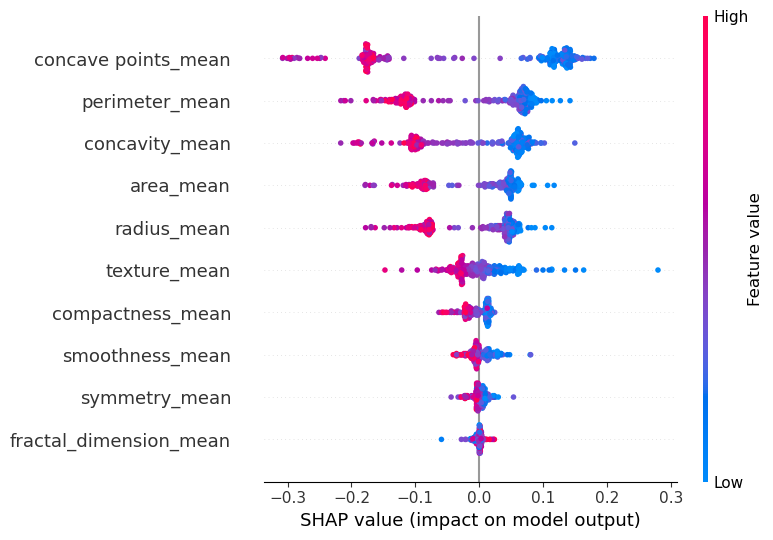

In [20]:
shap.summary_plot(shap_values[1], Xtrain)

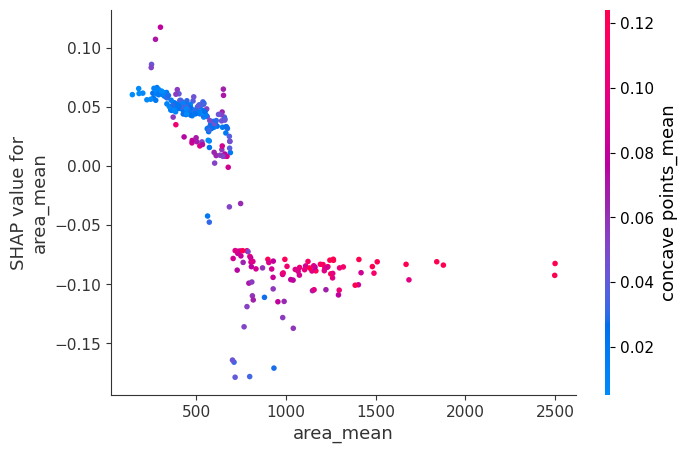

In [21]:
shap.dependence_plot("area_mean", shap_values[1], Xtrain, interaction_index="concave points_mean")